In [3]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv(r"C:\Users\ADMIN\Downloads\train.csv.zip")

In [5]:
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [6]:
#ID-id
#Gender-Gender
#Age-age
#Driving_License-it describes whether the person contains licence or not
#Region_Code-region code represents the vehicle region code
#Previously_Insured-whether the vehicle insured previously or not
#Vehicle_Age-Vehicle_Age
#Vehicle_Damage-the column represents whether the vehicle is damaged or not
#Annual_Premium-it shows the premium paid anually
#Policy_Sales_Channel- by which channel the customer communicates with the company
#Vintage-no. of Days customer associated with company
#Response-this column gives the response about the vehicle insuranced or not

In [7]:
data.head(4)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0


In [8]:
data.tail(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [9]:
data.shape

(381109, 12)

In [10]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [12]:
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [13]:
data.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [14]:
Gender={'Female':1,'Male':0}
data.replace({'Gender':Gender},inplace=True)

In [15]:
data['Gender'].value_counts()

0    206089
1    175020
Name: Gender, dtype: int64

In [16]:
Vehicle_Damage={'Yes':1,'No':0}
data.replace({'Vehicle_Damage':Vehicle_Damage},inplace=True)

In [17]:
data['Vehicle_Damage'].value_counts()

1    192413
0    188696
Name: Vehicle_Damage, dtype: int64

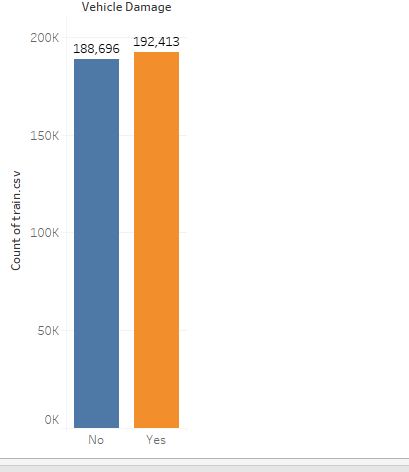

In [18]:
data['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [19]:
Vehicle_Age={'> 2 Years':2,'1-2 Year':1,'< 1 Year':0}
data.replace({'Vehicle_Age':Vehicle_Age},inplace=True)

In [20]:
data['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

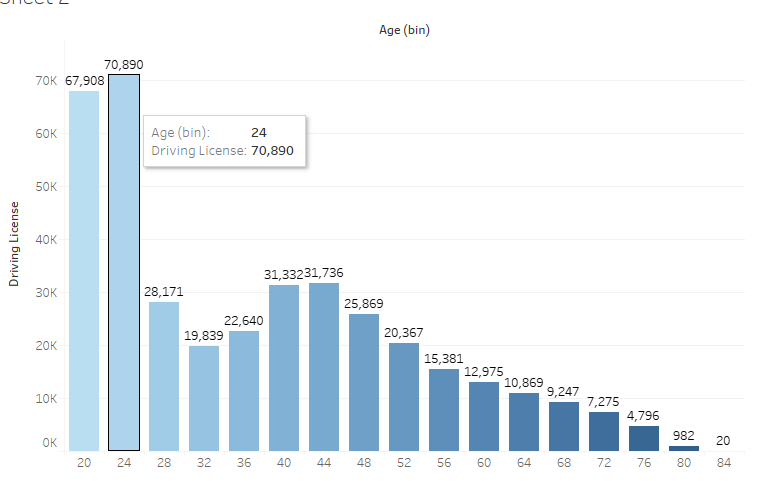

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  int64  
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  int64  
 7   Vehicle_Damage        381109 non-null  int64  
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 34.9 MB


<Axes: >

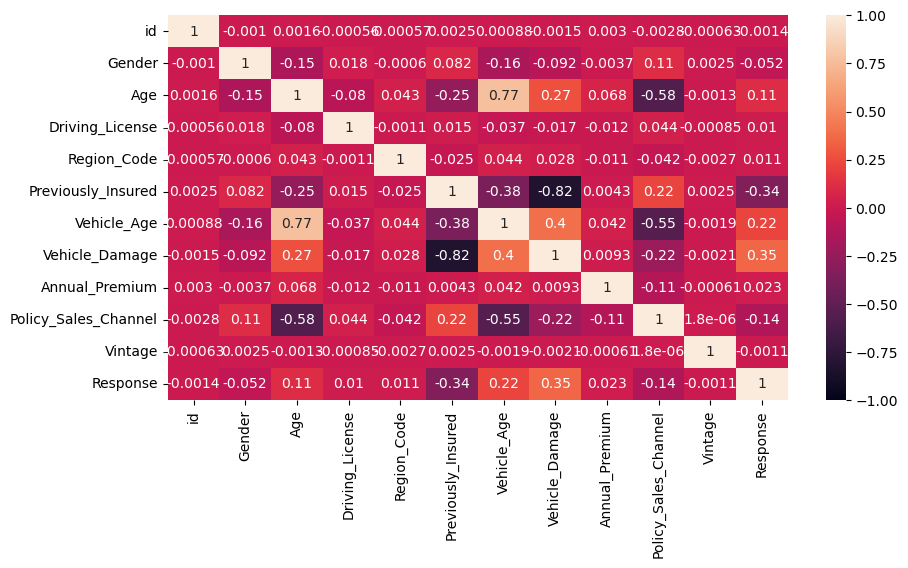

In [187]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1)

In [152]:
data1=data.drop(['id','Region_Code','Vintage'],axis=1)

In [153]:
data1

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response
0,0,44,1,0,2,1,40454.0,26.0,1
1,0,76,1,0,1,0,33536.0,26.0,0
2,0,47,1,0,2,1,38294.0,26.0,1
3,0,21,1,1,0,0,28619.0,152.0,0
4,1,29,1,1,0,0,27496.0,152.0,0
...,...,...,...,...,...,...,...,...,...
381104,0,74,1,1,1,0,30170.0,26.0,0
381105,0,30,1,1,0,0,40016.0,152.0,0
381106,0,21,1,1,0,0,35118.0,160.0,0
381107,1,68,1,0,2,1,44617.0,124.0,0


In [154]:
x=data1.drop(['Response'],axis=1)

In [155]:
x.head(4)

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel
0,0,44,1,0,2,1,40454.0,26.0
1,0,76,1,0,1,0,33536.0,26.0
2,0,47,1,0,2,1,38294.0,26.0
3,0,21,1,1,0,0,28619.0,152.0


In [156]:
y=data1['Response']

In [157]:
y.head(5)

0    1
1    0
2    1
3    0
4    0
Name: Response, dtype: int64

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [160]:
x_train.shape

(266776, 8)

In [161]:
y_train.shape

(266776,)

# LogisticRegression

In [162]:
from sklearn.linear_model import LogisticRegression

In [163]:
r=LogisticRegression()

In [164]:
reg=r.fit(x_train,y_train)

In [165]:
y_pred=r.predict(x_test)

In [166]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [167]:
from sklearn.metrics import confusion_matrix

In [168]:
cnf=confusion_matrix(y_test,y_pred)
cnf

array([[99023,  1172],
       [13423,   715]], dtype=int64)

In [188]:
print((99023+715)/(99023+1172+13423+715))

0.8723465666080659


<Axes: >

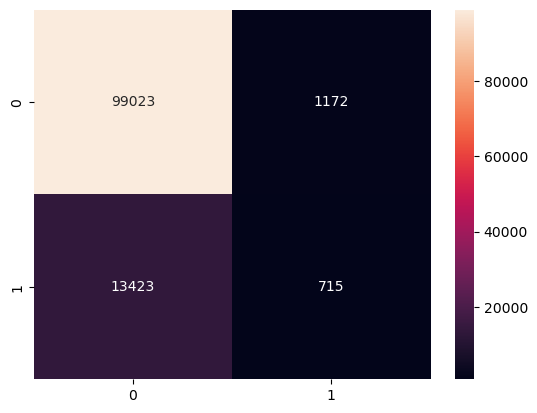

In [189]:
sns.heatmap(cnf,annot=True,fmt='d')

In [169]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8723465666080659

In [170]:
Results=pd.DataFrame(columns=['actual','predicted'])
Results['actual']=y_test
Results['predicted']=y_pred
Results=Results.reset_index()
Results['Id']=Results.index
Results.head(9)

,index,actual,predicted,Id
0,200222,0,0,0
1,49766,0,0,1
2,172201,0,0,2
3,160713,0,0,3
4,53272,0,0,4
5,372603,0,0,5
6,216160,0,1,6
7,59206,0,0,7
8,26462,0,0,8


[]

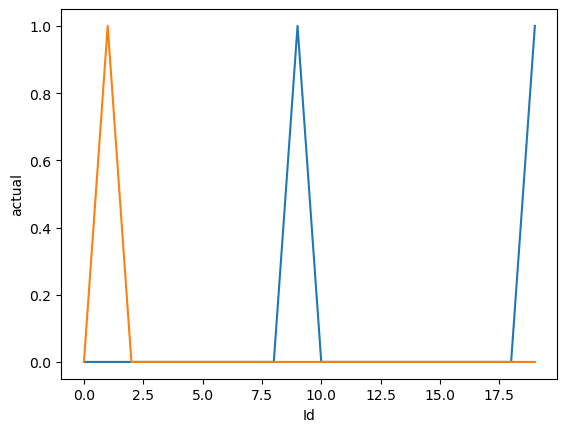

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='Id',y='actual',data=Results.head(20))
sns.lineplot(x='Id',y='predicted',data=Results.head(20))
plt.plot()

# RandomForestClassifier

In [173]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_pred=rfc.predict(x_test)

In [174]:
rfc_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [175]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,rfc_pred)

0.8435709725101239

In [176]:
Results=pd.DataFrame(columns=['actual','predicted'])
Results['actual']=y_test
Results['predicted']=rfc_pred
Results=Results.reset_index()
Results['Id']=Results.index
Results.head(9)

,index,actual,predicted,Id
0,200222,0,0,0
1,49766,0,1,1
2,172201,0,0,2
3,160713,0,0,3
4,53272,0,0,4
5,372603,0,0,5
6,216160,0,0,6
7,59206,0,0,7
8,26462,0,0,8


[]

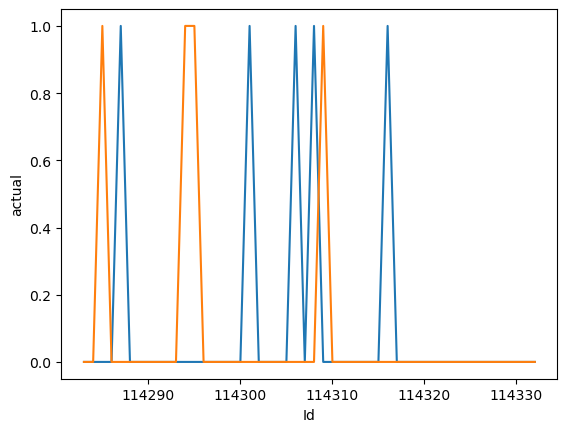

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='Id',y='actual',data=Results.tail(50))
sns.lineplot(x='Id',y='predicted',data=Results.tail(50))
plt.plot()

In [178]:
    #  logistic Regression     RandomForestClassifier
 # 0.25       0.8765             0.8434   
    
 # 0.30       0.8723             0.8427

 # 0.35       0.8766             0.8425

In [179]:
filename='new_vehical_insurance'
pickle.dump(reg,open(filename,'wb'))

In [180]:
x_test.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel
200222,1,21,1,1,0,0,20408.0,160.0
49766,0,55,1,0,1,1,37498.0,26.0
172201,1,41,1,0,1,1,2630.0,26.0
160713,1,26,1,0,0,0,2630.0,151.0
53272,0,51,1,0,1,1,34006.0,124.0


In [181]:
[[1,20,0,1,0,1,20467.0,161.0],[1,50,0,1,1,0,20467.0,16.0]]

[[1, 20, 0, 1, 0, 1, 20467.0, 161.0], [1, 50, 0, 1, 1, 0, 20467.0, 16.0]]